In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

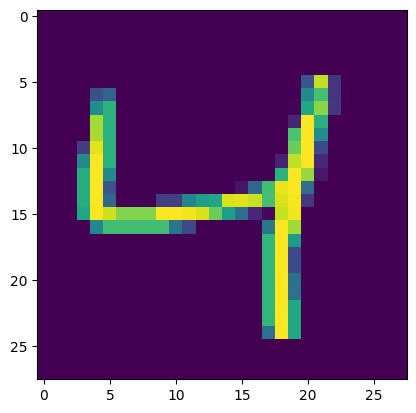

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
#making model and hidden layers
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#model compile
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2831 - accuracy: 0.9200 - val_loss: 0.1467 - val_accuracy: 0.9598
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1274 - accuracy: 0.9621 - val_loss: 0.1133 - val_accuracy: 0.9659
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0875 - accuracy: 0.9743 - val_loss: 0.0969 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.0925 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0496 - accuracy: 0.9855 - val_loss: 0.0899 - val_accuracy: 0.9721
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0888 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0936 - val_accu

In [15]:
#probability
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
#prediction
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9771

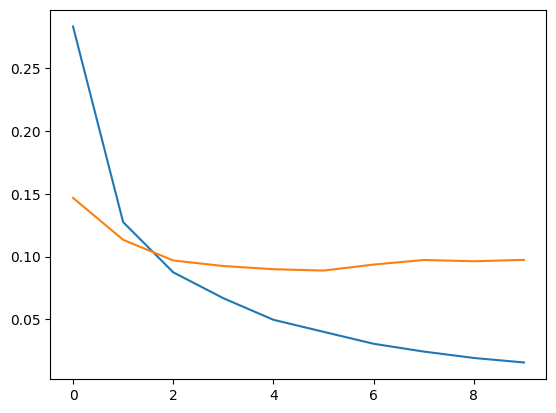

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

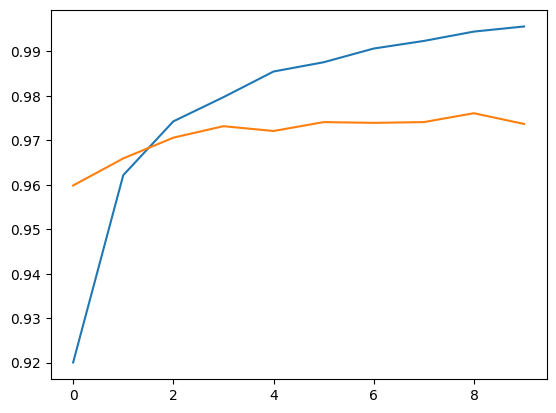

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

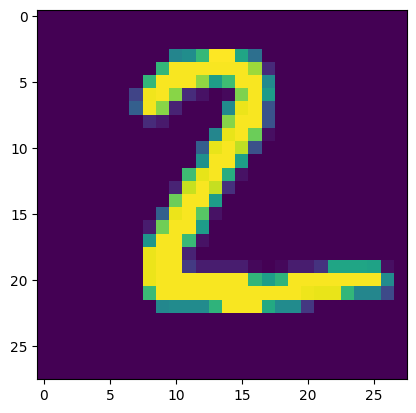

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 101ms/step


array([2])